# Weekly activity
1. Rotate image by 45 degrees without cropping the sides of the image. (Hint: There are 2 strategies to tackle these problems). Use _"lena.jfif"_ as the input image.
    - Use external libraries `imutils`.  
    - Modify the transformation matrix.
2. Use the images with titles: _"flower.jfif"_ and _"native-bee.png"_. I want to put flower above an image. If I add two images, it will change color. If I blend it, I get a transparent effect. But I want it to be opaque. If it was a rectangular region, we could use the ROI as we did in the previous section. But flower is not a rectangular region. This is where bitwise operations, like AND, OR, NOT and XOR really come in handy. The associated functions are `cv.bitwise_and()`, `cv.bitwise_or()` and `cv.bitwise_not()`. You need to use `cv.threshold` function to segment the flower. Please refer to [online documentation](https://docs.opencv.org/4.x/d0/d86/tutorial_py_image_arithmetics.html) for more info. The result should resemble the following:  
![bee and flowers](img_embed/activity3.PNG "bee_flower")
3. Write a function that randomly crop the central region of an image. The method signature should be as shown in the following:
```
random_center_crop(image, min_crop_ratio, max_crop_ratio)
```

4. Aside from Gaussian noise, name another common type of noise. Write the code to demonstrate how the noise can be included in an image.

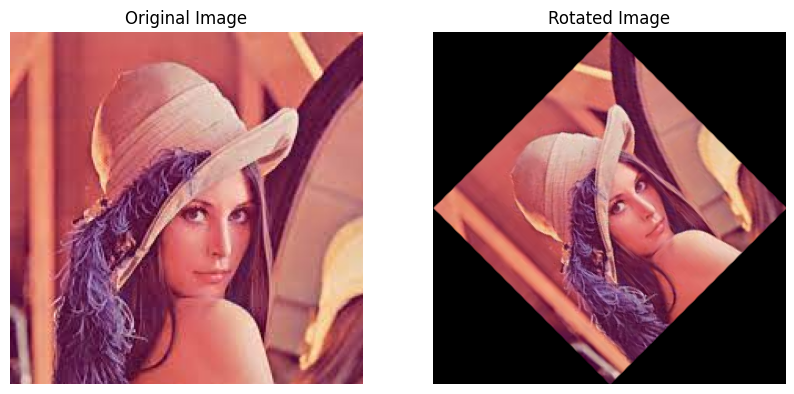

In [7]:
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/Users/fuji/Documents/notes/Y3S1/miniProject/week 4/codes/images/lena.jfif')

# Convert the image from BGR to RGB format
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Get the dimensions of the image
(h, w) = image.shape[:2]
(centerX, centerY) = (w // 2, h // 2)

# Calculate the rotation matrix
M = cv2.getRotationMatrix2D((centerX, centerY), 45, 1.0)

# Calculate the cosine and sine of the rotation matrix
cos = np.abs(M[0, 0])
sin = np.abs(M[0, 1])

# Compute the new bounding dimensions of the image
nW = int((h * sin) + (w * cos))
nH = int((h * cos) + (w * sin))

# Adjust the rotation matrix to take into account translation
M[0, 2] += (nW / 2) - centerX
M[1, 2] += (nH / 2) - centerY

# Perform the actual rotation and return the image
rotated = cv2.warpAffine(image, M, (nW, nH))

# Display the original and rotated images
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

ax[0].imshow(image)
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(rotated)
ax[1].set_title("Rotated Image")
ax[1].axis("off")

plt.show()


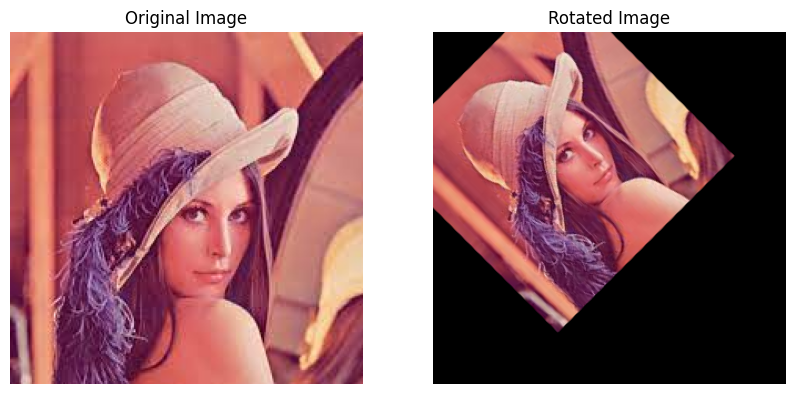

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/Users/fuji/Documents/notes/Y3S1/miniProject/week 4/codes/images/lena.jfif')

# Convert the image from BGR to RGB format
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Get the dimensions of the image
(h, w) = image.shape[:2]
(centerX, centerY) = (w // 2, h // 2)

# Calculate the rotation matrix
M = cv2.getRotationMatrix2D((centerX, centerY), 45, 1.0)

# Calculate the cosine and sine of the rotation matrix
cos = np.abs(M[0, 0])
sin = np.abs(M[0, 1])

# Compute the new bounding dimensions of the image
nW = int((h * sin) + (w * cos))
nH = int((h * cos) + (w * sin))

# Adjust the rotation matrix to take into account translation
M[0, 2] += (nW / 2) - centerX
M[1, 2] += (nH / 2) - centerY

# Manually modify the transformation matrix to ensure no cropping
M_modified = np.array([[cos, sin, (1 - cos) * centerX - sin * centerY],
                       [-sin, cos, sin * centerX + (1 - cos) * centerY]])

# Perform the actual rotation and return the image
rotated = cv2.warpAffine(image, M_modified, (nW, nH))

# Display the original and rotated images using matplotlib
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

ax[0].imshow(image)
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(rotated)
ax[1].set_title("Rotated Image")
ax[1].axis("off")

plt.show()


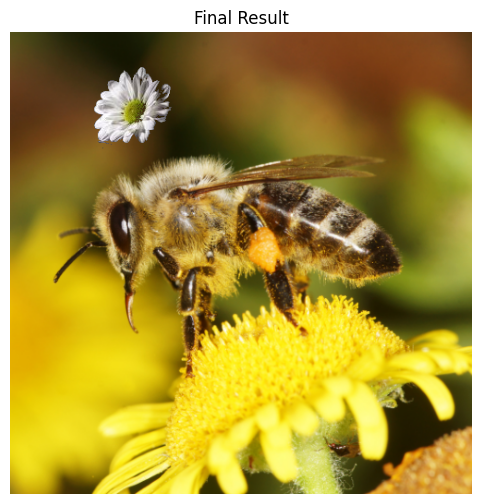

In [20]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the images
flower = cv.imread("images/flower.jfif", cv.IMREAD_UNCHANGED)
bee = cv.imread("images/native-bee.png", cv.IMREAD_UNCHANGED)

# Convert the flower image to grayscale
flower_gray = cv.cvtColor(flower, cv.COLOR_BGR2GRAY)

# Apply a binary threshold to create a mask (best result)
_, mask = cv.threshold(flower_gray, 70, 255, cv.THRESH_BINARY)

# Create an inverted mask
mask_inv = cv.bitwise_not(mask)

# Define the coordinates where you want to place the flower image on the bee image
top_left_x = 0  # X coordinate of the top-left corner
top_left_y = 0  # Y coordinate of the top-left corner

# Get the height and width of the flower image
flower_height, flower_width = flower.shape[:2]

# Get the region of interest (ROI) on the bee image where the flower will be placed
roi = bee[top_left_y:top_left_y + flower_height, top_left_x:top_left_x + flower_width].copy()

# Apply the mask to the flower and background regions
flower_fg = cv.bitwise_and(flower[..., :3], flower[..., :3], mask=mask)
bee_bg = cv.bitwise_and(roi[..., :3], roi[..., :3], mask=mask_inv)

# Ensure both images have the same number of channels
if flower_fg.shape[2] != bee_bg.shape[2]:
    flower_fg = cv.cvtColor(flower_fg, cv.COLOR_BGR2BGRA)
    bee_bg = cv.cvtColor(bee_bg, cv.COLOR_BGR2BGRA)

# Combine the flower and bee regions
result_roi = cv.add(bee_bg, flower_fg)

# Copy the combined region back into the original bee image
bee[top_left_y:top_left_y + flower_height, top_left_x:top_left_x + flower_width, :3] = result_roi[..., :3]

# Display the final result using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(cv.cvtColor(bee, cv.COLOR_BGR2RGB))
plt.title("Final Result")
plt.axis('off')
plt.show()


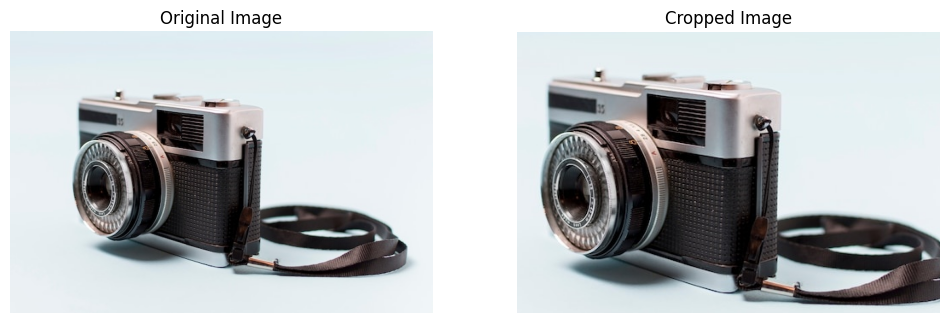

In [22]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

def random_center_crop(image, min_crop_ratio, max_crop_ratio):
    """
    Randomly crop the central region of an image.

    Parameters:
    image (numpy array): The input image.
    min_crop_ratio (float): The minimum ratio for cropping.
    max_crop_ratio (float): The maximum ratio for cropping.

    Returns:
    cropped_image (numpy array): The cropped image.
    """

    # Ensure the crop ratios are between 0 and 1
    assert 0 <= min_crop_ratio <= 1, "min_crop_ratio should be between 0 and 1"
    assert 0 <= max_crop_ratio <= 1, "max_crop_ratio should be between 0 and 1"
    assert min_crop_ratio <= max_crop_ratio, "min_crop_ratio should be less than or equal to max_crop_ratio"

    # Get the dimensions of the image
    h, w = image.shape[:2]

    # Randomly choose a crop ratio between the min and max crop ratios
    crop_ratio = random.uniform(min_crop_ratio, max_crop_ratio)

    # Calculate the crop dimensions
    crop_h = int(h * crop_ratio)
    crop_w = int(w * crop_ratio)

    # Calculate the starting points for the crop
    start_x = (w - crop_w) // 2
    start_y = (h - crop_h) // 2

    # Crop the image
    cropped_image = image[start_y:start_y + crop_h, start_x:start_x + crop_w]

    return cropped_image

# Example usage
image = cv2.imread('images/camera.jpg')

# Randomly crop the central region with ratios between 0.5 and 0.8
cropped_image = random_center_crop(image, 0.5, 0.8)

# Convert images from BGR to RGB for display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cropped_image_rgb = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)

# Display the original and cropped images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(image_rgb)
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(cropped_image_rgb)
ax[1].set_title("Cropped Image")
ax[1].axis("off")

plt.show()


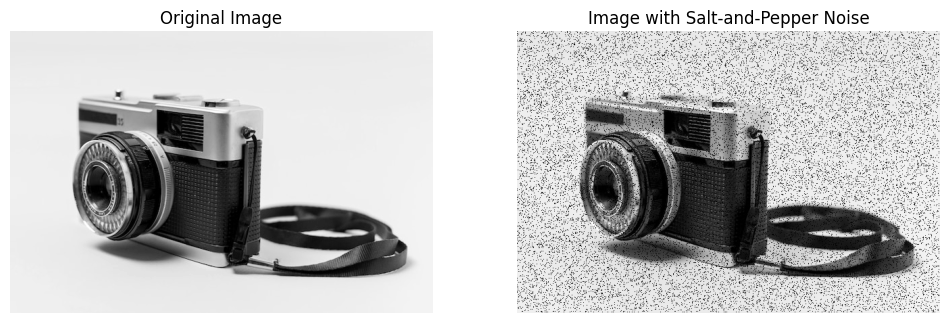

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def add_salt_and_pepper_noise(image, salt_prob, pepper_prob):
    """
    Add salt-and-pepper noise to an image.

    Parameters:
    image (numpy array): The input image.
    salt_prob (float): Probability of adding salt (white) noise.
    pepper_prob (float): Probability of adding pepper (black) noise.

    Returns:
    noisy_image (numpy array): The image with salt-and-pepper noise.
    """

    # Make a copy of the image to not modify the original
    noisy_image = image.copy()

    # Generate salt noise
    num_salt = np.ceil(salt_prob * image.size)
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    noisy_image[coords[0], coords[1]] = 1

    # Generate pepper noise
    num_pepper = np.ceil(pepper_prob * image.size)
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    noisy_image[coords[0], coords[1]] = 0

    return noisy_image

# Load the image
image = cv2.imread('images/camera.jpg', cv2.IMREAD_GRAYSCALE)

# Add salt-and-pepper noise with probabilities 0.05 for salt and 0.05 for pepper
noisy_image = add_salt_and_pepper_noise(image, 0.05, 0.05)

# Display the original and noisy images using matplotlib
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(noisy_image, cmap='gray')
ax[1].set_title("Image with Salt-and-Pepper Noise")
ax[1].axis("off")

plt.show()
